# Milestone 1: Project proposal

## 1.Preparation

* Dataset selected: SportsStats as it's much closer and more understandable than politic data (xD)


* Import and clean data: i will use pandas in this project to work with SQL file

In [1]:
import pandas as pd

athlete_data = pd.read_csv('athlete_events.csv')
noc_data = pd.read_csv('noc_regions.csv')

* Initial data exploration:

In [2]:
athlete_data.info()
athlete_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


* Seems like there are some missing data with Age, Height and Weight. Ignorable, as the number of missing data is not significant

In [3]:
noc_data.info()
noc_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


* ERD of dataset:

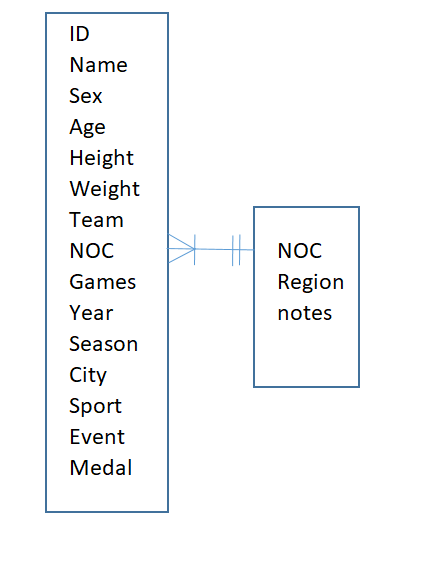

## 2. Proposal
* This is project Alma. Objective of this project is to find the insight from 120 years of Olympics data, which could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights. Main target audience of this project would be elite personal trainers and news company. Our main tool would be Jupyter notebook.

**Hypothesis:**
* Hypothesis 1: There is a relationship between athlete's age and the medal they gained. Maybe younger athlete had higher chance of getting prize than those who were older

* Hypothesis 2: Some countries have greater advantage than other in specific season, and that's not the same between summer and winter. Maybe countries in colder area around the year would be more comfortable to compete in winter?

**Approach:**
* Filter the dataset for data needed -> visualize for judgement

# Milestone 2: Descriptive Stats

In [4]:
#This command will allow us to use SQL command on pandas dataframe
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

## 1. Checking hypothesis


### Hypothesis 1: There is a relationship between athlete's age and the medal they gained. Maybe younger athlete had higher chance of getting prize than those who were older

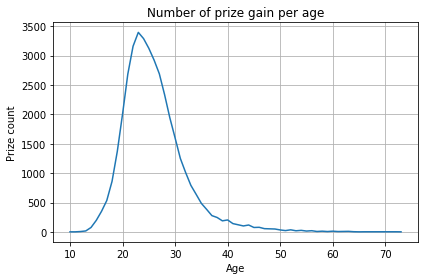

In [5]:
#Count the number of medal per age
athlete_data_medal_age = pysqldf('SELECT Age, COUNT(Medal)FROM athlete_data WHERE (Medal IS NOT NULL AND Age IS NOT NULL) GROUP BY Age ORDER BY Age')

#Visualize the number of medal per age
from matplotlib import pyplot as plt


hypo1_age = athlete_data_medal_age['Age']
hypo1_medal = athlete_data_medal_age['COUNT(Medal)']

plt.plot(hypo1_age,hypo1_medal)

plt.title('Number of prize gain per age')
plt.xlabel('Age')
plt.ylabel('Prize count')
plt.tight_layout()
plt.grid()
plt.savefig('abc.png')

**Conclusion 1: Yes, there is a relationship between age and probability of gain the prize, as prime age is around 23-24**

### Hypothesis 2: Some countries have greater advantage than other in specific season, and that's not the same between summer and winter. Maybe countries in colder area around the year would be more comfortable to compete in winter?

In [6]:
# Summer medal count
pysqldf('SELECT Team, COUNT(Medal) AS Summer_medal FROM athlete_data WHERE Season = "Summer" GROUP BY Team ORDER BY COUNT(Medal) DESC LIMIT 5')

,Team,Summer_medal
0,United States,4686
1,Soviet Union,2061
2,Germany,1687
3,Great Britain,1598
4,France,1408


In [7]:
#Winter medal count
pysqldf('SELECT Team, COUNT(Medal) AS Winter_medal FROM athlete_data WHERE Season = "Winter" GROUP BY Team ORDER BY COUNT(Medal) DESC LIMIT 5')

,Team,Winter_medal
0,Canada,575
1,United States,533
2,Norway,443
3,Sweden,428
4,Finland,426


**Conclusion 2: Seems like it's true, with top 5 countries in Summer different from those in Winter, except for USA**

## 2. Descriptive stats

In [8]:
print(athlete_data.describe(include='all'))

                   ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116       271116   
unique 

## 3. Further question
* Does BMI index affect the chance of gaining higher prize?

# Milestone 3: Beyond Descriptive Stats

* In order to answer the above question related to BMI index, we need to create 2 new metric: BMI and medal in number (gold/silver/bronze as 3/2/1) 

In [9]:
#Create a new metric - BMI and turn medal from gold/silver/bronze to 3/2/1
athlete_data_BMI_medal = pysqldf('SELECT Weight/Height/Height*10000 AS  BMI_index, CASE WHEN Medal = "Gold" THEN 3 WHEN Medal = "Silver" THEN 2 WHEN Medal = "Bronze" THEN 1 END prize_num FROM athlete_data WHERE (Medal IS NOT NULL AND Weight IS NOT NULL AND Height IS NOT NULL) ORDER BY Weight/Height/Height ASC')
athlete_data_BMI_medal_round = pysqldf('SELECT ROUND(BMI_index,0) AS BMI, COUNT(prize_num) AS prize_count, AVG(prize_num) as prize_avg FROM athlete_data_BMI_medal GROUP BY ROUND(BMI_index,0) ORDER BY ROUND(BMI_index,0) ASC')

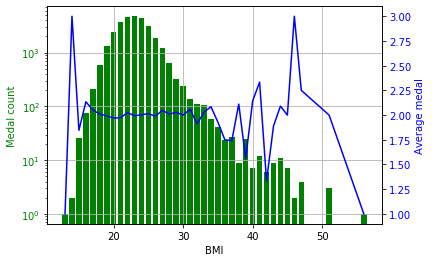

In [10]:
bmi = athlete_data_BMI_medal_round['BMI']
prize_count = athlete_data_BMI_medal_round['prize_count']
prize_avg = athlete_data_BMI_medal_round['prize_avg']

plt.bar(bmi,prize_count,color='Green',log=True)
plt.xlabel('BMI')
plt.ylabel('Medal count',color = 'Green')
plt.tick_params(axis='y', labelcolor='Green')
plt.grid()

plt2 = plt.twinx()
plt2.plot(bmi,prize_avg,color='Blue')
plt2.set_ylabel('Average medal',color='Blue')
plt2.tick_params(axis='y', labelcolor='Blue')

plt.savefig('123.png')

* As we can see, there are no specific relationship between BMI and medal gained. However, we can see that the prime BMI for athlete would be around 20 - 22, where they would gain the highest number of medal